## The goal: explore coupling metrics between CAM6 and CLM5 from MOAR simulation. 
Author: Meg D. Fowler <br>
Date:   10 Aug 2020 <br><br>

In [1]:
# Import libraries 
import comet as cm 
import numpy as np 
import xarray as xr 
import pickle
import pandas as pd

# Plotting utils 
import matplotlib.pyplot as plt 
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.util


## Read in data

In [2]:
# Set directories and file names 
dailyDir   = '/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/data/day/'
middleName = '_day_CESM2_amip_r10i1p1f1_gn_'
varNames   = ['hfls','hfss','mrso','mrsos','tas','hurs','ps']

# Set time period portion of fileNames 
# timeName_flx  = ['19500101-19591231','19600101-19691231','19700101-19791231','19800101-19891231', 
#                  '19900101-19991231','20000101-20091231','20100101-20150101']
timeName_flx  = ['19700101-19791231','19800101-19891231', 
                 '19900101-19991231','20000101-20091231','20100101-20150101']

timeName_soil = ['19500101-19991231','20000101-20150101']


In [3]:
# Read in test file to get lat/lon 
fileName = dailyDir+varNames[0]+middleName+timeName_flx[0]+'.nc'
testDF   = xr.open_dataset(fileName, decode_times=True)

# Get lat and lon 
lat = testDF.lat.values
lon = testDF.lon.values 


/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'hfls' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


In [4]:
# Read in surface fluxes along

for iT in range(len(timeName_flx)):

    # --- Compile surface fluxes into singe large arrays in time 

    # Latent heat flux
    lhFile       = dailyDir+varNames[0]+middleName+timeName_flx[iT]+'.nc' # File name
    lhDF         = xr.open_dataset(lhFile,decode_times=True) 
    lhDF['time'] = lhDF.indexes['time'].to_datetimeindex()

    # Sensible heat flux
    shFile       = dailyDir+varNames[1]+middleName+timeName_flx[iT]+'.nc' # File name
    shDF         = xr.open_dataset(shFile,decode_times=True)
    shDF['time'] = shDF.indexes['time'].to_datetimeindex() # Convert from cf time (non-standard calendar) to datetime

#     # --- Compile surface T and RH into large arrays 

#     # Sfc Temp
#     tFile          = dailyDir+varNames[4]+middleName+timeName_flx[iT]+'.nc' # File name
#     TsfcDF         = xr.open_dataset(tFile,decode_times=True) 
#     TsfcDF['time'] = TsfcDF.indexes['time'].to_datetimeindex()

#     # Sfc RH
#     rhFile       = dailyDir+varNames[5]+middleName+timeName_flx[iT]+'.nc' # File name
#     rhDF         = xr.open_dataset(rhFile,decode_times=True)
#     rhDF['time'] = rhDF.indexes['time'].to_datetimeindex() # Convert from cf time (non-standard calendar) to datetime

#     # Sfc pressure
#     psFile       = dailyDir+varNames[6]+'_CFday_CESM2_amip_r10i1p1f1_gn_'+timeName_flx[iT]+'.nc' # File name
#     psDF         = xr.open_dataset(psFile,decode_times=True)
#     psDF['time'] = psDF.indexes['time'].to_datetimeindex() # Convert from cf time (non-standard calendar) to datetime

    if iT==0:
        lhflx_full = lhDF 
        shflx_full = shDF
#         Tsfc_full  = TsfcDF 
#         RHsfc_full = rhDF
#         Psfc_full  = psDF
    else: 
        lhflx_full = xr.concat([lhflx_full, lhDF], dim="time")
        shflx_full = xr.concat([shflx_full, shDF], dim="time")
#         Tsfc_full  = xr.concat([Tsfc_full,  TsfcDF], dim="time")
#         RHsfc_full = xr.concat([RHsfc_full, rhDF],   dim="time")
#         Psfc_full  = xr.concat([Psfc_full,  psDF],   dim="time")

    print('Done with ', timeName_flx[iT])


/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  # Remove the CWD from sys.path while we load stuff.
/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'hfss' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  from ipykernel impor

Done with  19700101-19791231
Done with  19800101-19891231
Done with  19900101-19991231
Done with  20000101-20091231
Done with  20100101-20150101


In [4]:
# Read in soil moisture

for iT in range(len(timeName_soil)):

    # --- Compile surface fluxes into singe large arrays in time 

    # Latent heat flux
    soilFile = dailyDir+varNames[2]+middleName+timeName_soil[iT]+'.nc' # File name
    soilDF   = xr.open_dataset(soilFile,decode_times=True) 
    soilDF['time'] = soilDF.indexes['time'].to_datetimeindex()
    
    # Sensible heat flux
    soil10File = dailyDir+varNames[3]+middleName+timeName_soil[iT]+'.nc' # File name
    soil10DF   = xr.open_dataset(soil10File,decode_times=True)
    soil10DF['time'] = soil10DF.indexes['time'].to_datetimeindex()
    
    if iT==0:
        soilM_full   = soilDF 
        soilM10_full = soil10DF
    else: 
        soilM_full   = xr.concat([soilM_full, soilDF], dim="time")
        soilM10_full = xr.concat([soilM10_full, soil10DF], dim="time")

    print('Done with ', timeName_soil[iT])


/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'mrso' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  # Remove the CWD from sys.path while we load stuff.
/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'mrsos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Converting a CFTimeIndex with da

Done with  19500101-19991231
Done with  20000101-20150101


In [8]:
# Load pressure level of LCL (computed separately in Get_LCLpressure.py and saved as pickle file)
lclPath = '/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/LCL-pressure_1950-2014.p'
Plcl    = pickle.load( open( lclPath, "rb" ) )


Plot average pressure level of the LCL - does this seem reasonable? <br>
Probably; It's of course a much different value over mountains and high terrain, so it's good to see that. Pretty consistent and low in the atmosphere for ocean gridcells. 

Text(0.5, 1.0, 'Pressure Level of LCL (time average)')

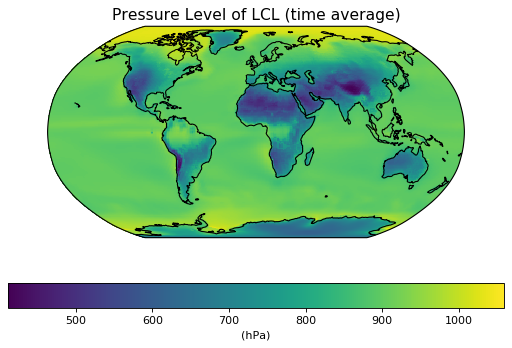

In [6]:
# Map out average pressure level of the LCL

fig=plt.figure(figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
Plcl_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(np.nanmean(Plcl,0)), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,Plcl_cyclic,transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='(hPa)',orientation='horizontal')
ax.set_title('Pressure Level of LCL (time average)', fontsize=14)



To see if I can get things to run, I limited timeframe to 1970-2015. So limit SM and Plcl: 

In [5]:
# To be able to easily access years, months, days - use Pandas 
dates    = pd.DatetimeIndex(soilM10_full['time'].values)

# Indices of dates to include 
iInclude = np.where(dates.year>=1970)[0]


In [9]:
print('Shape of data before limiting...  ', np.shape(Plcl))
print('Goal to match is shape of SHFLX.. ', np.shape(shflx_full.hfss))

# Limit data
Plcl_sel    = Plcl[iInclude,:,:]
soilM_sel   = np.asarray(soilM_full.mrso)[iInclude,:,:]
soilM10_sel = np.asarray(soilM10_full.mrsos)[iInclude,:,:]

# Check final shape
print()
print('New shape of Plcl...  ', np.shape(Plcl_sel))
print('New shape of SM_10... ', np.shape(soilM10_sel))


Shape of data before limiting...   (23726, 192, 288)
Goal to match is shape of SHFLX..  (16426, 192, 288)

New shape of Plcl...   (16426, 192, 288)
New shape of SM_10...  (16426, 192, 288)


**Quick test to make sure these variables looks reasonable**

Text(0.5, 1.0, 'LHFLX (time mean, 1950-2014)')

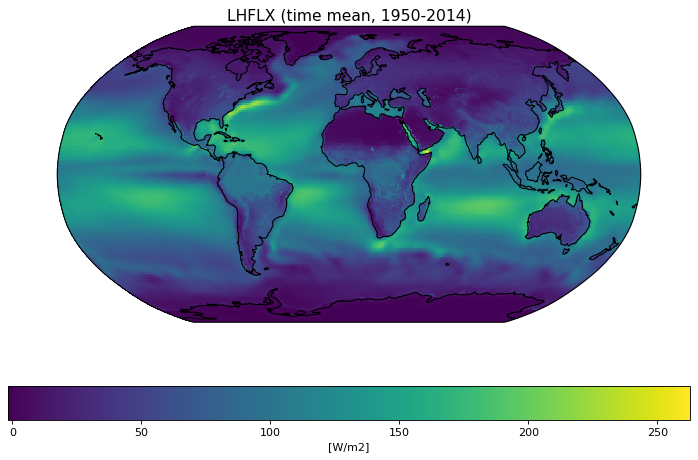

In [7]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
LHavg_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(np.nanmean(lhflx_full.hfls,0)), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,LHavg_cyclic,transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[W/m2]',orientation='horizontal')
ax.set_title('LHFLX (time mean, 1950-2014)', fontsize=14)


/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


Text(0.5, 1.0, '10cm Soil Moisture (time mean, 1950-2014)')

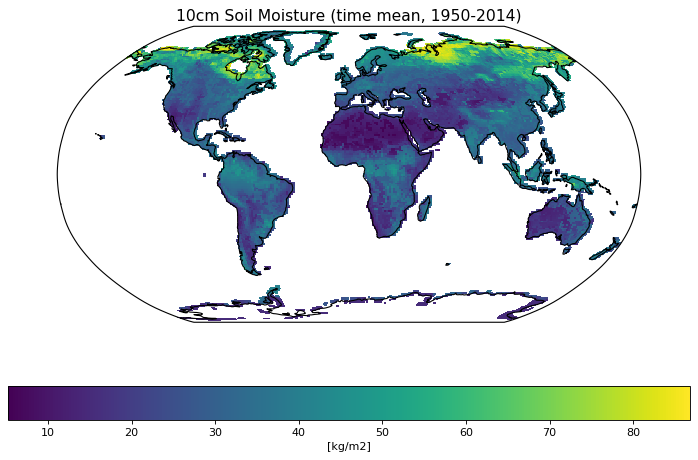

In [56]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
SMavg_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(np.nanmean(soilM10_full.mrsos,0)), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,SMavg_cyclic,transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('10cm Soil Moisture (time mean, 1950-2014)', fontsize=14)


Text(0.5, 1.0, 'Surface Temperature (time mean, 1950-2014)')

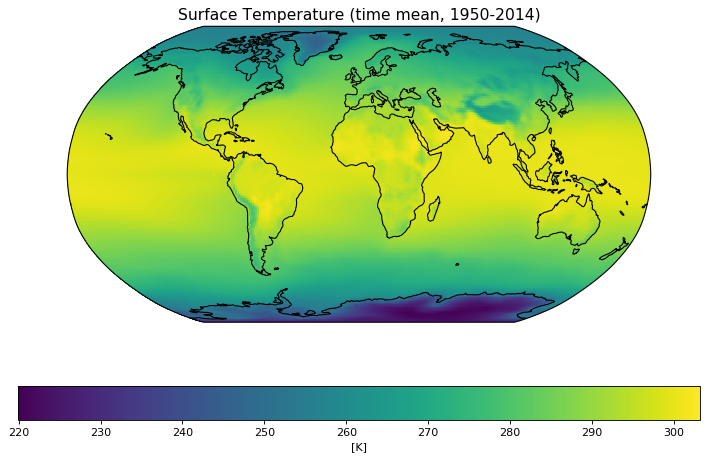

In [8]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
Tsfc_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(np.nanmean(Tsfc_full.tas,0)), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,Tsfc_cyclic,transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[K]',orientation='horizontal')
ax.set_title('Surface Temperature (time mean, 1950-2014)', fontsize=14)


## Coupling metrics

### Terrestrial coupling index

In [69]:
# Combine two variables into single dataset 
TS = lhflx_full.assign({'mrsos': (('time','lat','lon'), soilM10_full['mrsos'])})


In [73]:
terra_coupling = cm.metrics.CouplingIndex()
terra_coupling = terra_coupling.compute(TS, xname='mrsos',yname='hfls',averaging='season')

/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [74]:
terra_coupling

<xarray.Dataset>
Dimensions:        (lat: 192, lon: 288, season: 4)
Coordinates:
  * lat            (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon            (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * season         (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    mrsos_hfls_CI  (season, lat, lon) float64 nan nan nan nan ... nan nan nan

Text(0.5, 1.0, 'Terrestrial Coupling Index (10cm SM and LHFLX) [DJF]')

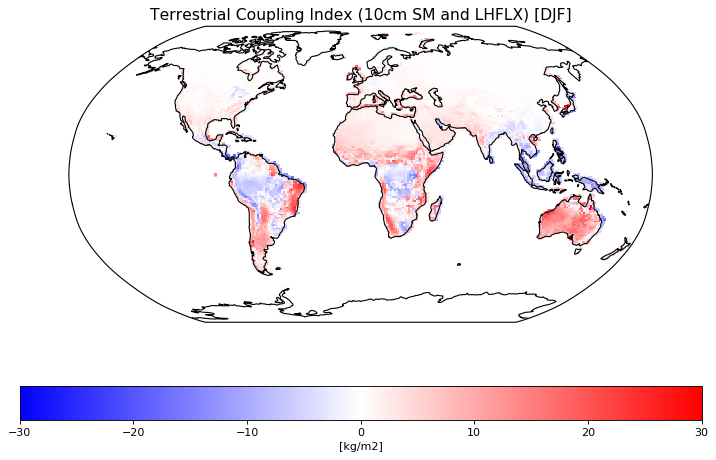

In [81]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_DJF, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terra_coupling.mrsos_hfls_CI[0,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_DJF,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (10cm SM and LHFLX) ['+np.asarray(terra_coupling.season)[0]+']', fontsize=14)


Text(0.5, 1.0, 'Terrestrial Coupling Index (10cm SM and LHFLX) [JJA]')

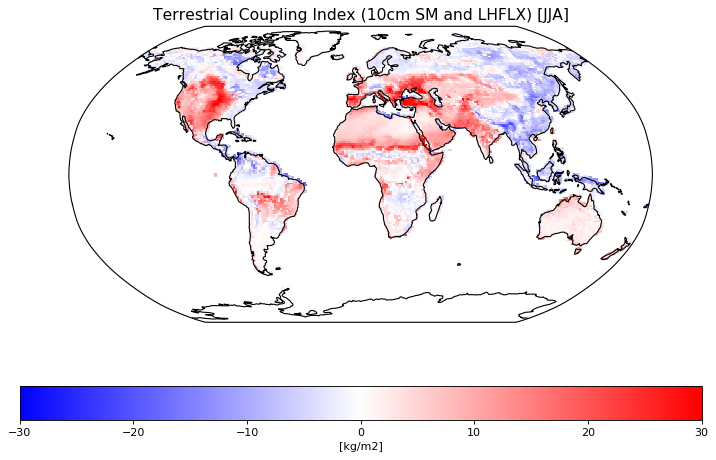

In [89]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_JJA, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terra_coupling.mrsos_hfls_CI[1,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_JJA,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (10cm SM and LHFLX) ['+np.asarray(terra_coupling.season)[1]+']', fontsize=14)



Text(0.5, 1.0, 'Terrestrial Coupling Index (10cm SM and LHFLX) [MAM]')

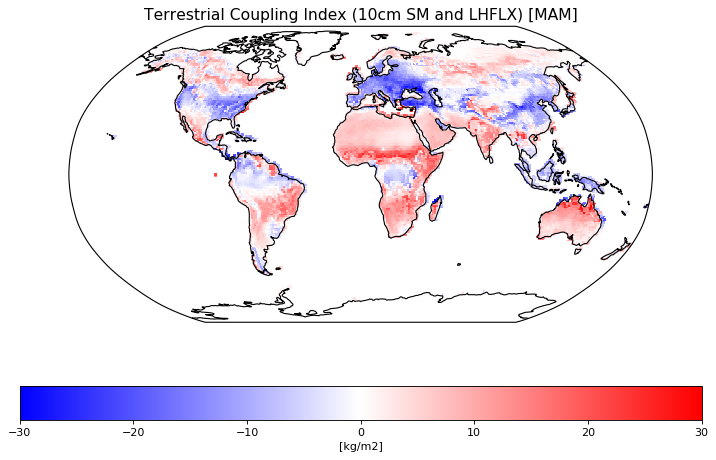

In [91]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_MAM, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terra_coupling.mrsos_hfls_CI[2,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_MAM,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (10cm SM and LHFLX) ['+np.asarray(terra_coupling.season)[2]+']', fontsize=14)



Text(0.5, 1.0, 'Terrestrial Coupling Index (10cm SM and LHFLX) [SON]')

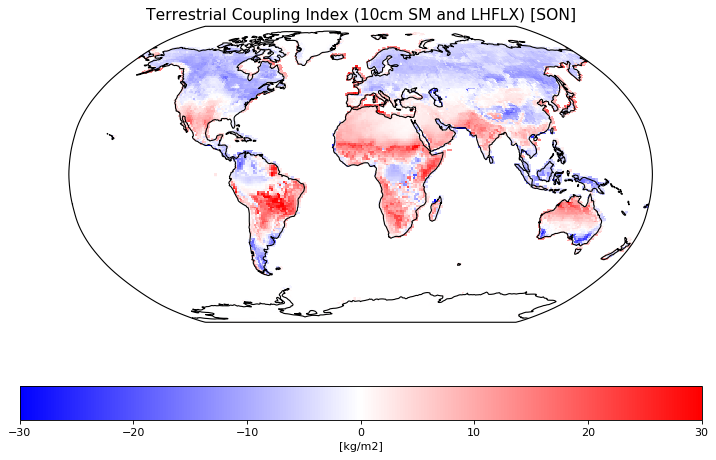

In [92]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_SON, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terra_coupling.mrsos_hfls_CI[3,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_SON,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (10cm SM and LHFLX) ['+np.asarray(terra_coupling.season)[3]+']', fontsize=14)


### Atmospheric leg of the coupling index
Following the path outlined in Dirmeyer et al. (2014), we can use RH and T to get the dewpoint temperature, which can then be used along with PS and T to get the pressure level of the LCL. The authors note that this is highly correlated with the height of the boundary layer. The coupling between that pressure level and the sensible heat flux (and SM with SHFLX) can give an idea of the full L-A coupling in a region.<br><br>
The dew point is computed following the Magnus formula, as outlined in Eq (3)- Eq (8) of Lawrence et al. (2005; BAMS). 
<br><br>
<b>Note:</b> When attempting to carry out above steps in Jupyter Notebook, kernal kept dying when ~85% of the way through computing Plcl. So moved to separate python script: Get_LCLpressure.py. <br>

In [18]:
np.shape(shflx_full.hfss)

(16426, 192, 288)

In [26]:
# Make one big xr.Dataset containing all the information we need  
dFull = shflx_full
dFull['mrsos'] = (('time','lat','lon'), soilM10_sel)
dFull['Plcl']  = (('time','lat','lon'), Plcl_sel)


In [31]:
# --- Compute coupling index between soil moisture and sensible heat flux (terrestrial leg) --- # 

# Combine variables into single dataset 
# dH_dW   = shflx_full.assign({'mrsos': (('time','lat','lon'), soilM10_sel['mrsos'])})  # SM & SHFLX

# Compute coupling index 
terraLeg_coupling = cm.metrics.CouplingIndex()
terraLeg_coupling = terraLeg_coupling.compute(dFull, xname='mrsos',yname='hfss',averaging='season')

# Save to netCDF file
terraLeg_coupling.to_netcdf('/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/TerraLeg_coupling_shf_vs_soilm_1970-2015.nc')


/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [32]:
# --- Compute coupling index between sensible heat flux and pressure level of LCL (atmospheric leg) --- #

# Combine variables into single dataset 
#dLCL_dH = shflx_full.assign({'Plcl': (('time','lat','lon'), Plcl_sel)})                    # P_LCL & SHFLX

# Compute coupling index 
atmoLeg_coupling = cm.metrics.CouplingIndex()
atmoLeg_coupling = atmoLeg_coupling.compute(dFull, xname='hfss',yname='Plcl',averaging='season')

# Save to netCDF file 
atmoLeg_coupling.to_netcdf('/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/AtmoLeg_coupling_Plcl_vs_shf_1970-2015.nc')


In [9]:
# # Compute sensitivity in total pathway (option 1: connection between SM and LCL pressure)

# # Combine variables into single dataset 
# dH_dW   = shflx_full.assign({'mrsos': (('time','lat','lon'), soilM10_sel['mrsos'])})  # SM & SHFLX
# #dLCL_dW = dH_dW.assign({'Plcl': (('time','lat','lon'), Plcl)})                  # SM & P_LCL

# # Compute coupling index 
# totalSensitivity = cm.metrics.CouplingIndex()
# totalSensitivity = totalSensitivity.compute(dLCL_dH, xname='hfss',yname='Plcl',averaging='season')

# # Save to netCDF file 
# totalSensitivity.to_netcdf('/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/TotalPathway_coupling_Plcl_vs_soilm.nc')


(23726, 192, 288)

Text(0.5, 1.0, 'Terrestrial Coupling Index (10cm SM and SHFLX) [JJA]')

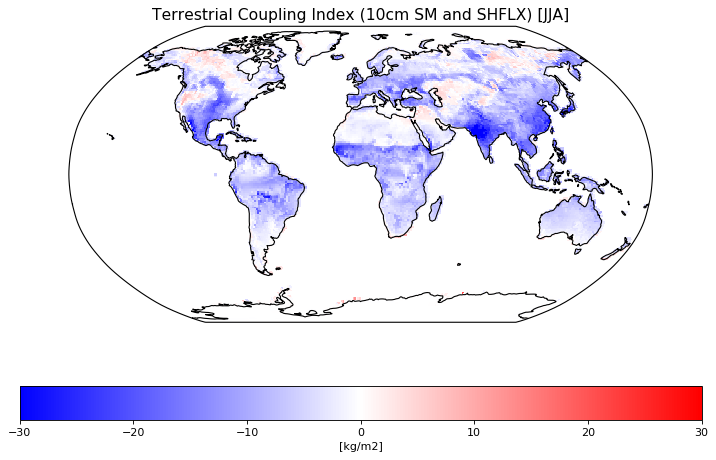

In [9]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_JJA, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terraLeg_coupling.mrsos_hfss_CI[1,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_JJA,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (10cm SM and SHFLX) ['+np.asarray(terraLeg_coupling.season)[1]+']', fontsize=14)


### Basing off of netCDF files: 

In [6]:
# Open nc files into xr datasets 
atmoLeg_coupling  = xr.open_dataset('/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/AtmoLeg_coupling_Plcl_vs_shf_1970-2015.nc', decode_times=False)
terraLeg_coupling = xr.open_dataset('/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/TerraLeg_coupling_shf_vs_soilm_1970-2015.nc', decode_times=False)


In [35]:
# The total pathway sensitvity should be the product of terraLeg_coupling and atmoLeg_coupling
totalSensitivity = terraLeg_coupling.mrsos_hfss_CI * atmoLeg_coupling.hfss_Plcl_CI


**Now let's make some maps and compare to Dirmeyer etal. (2014) -- and hope that they're similar!**

In [13]:
# First choose season of interest: 

print('Seasons are: ', np.asarray(atmoLeg_coupling.season))
print()

iSeason = 1 
print('Selected season:', np.asarray(atmoLeg_coupling.season)[iSeason])


Seasons are:  ['DJF' 'JJA' 'MAM' 'SON']

Selected season: JJA


In [51]:
max(lon)

358.75

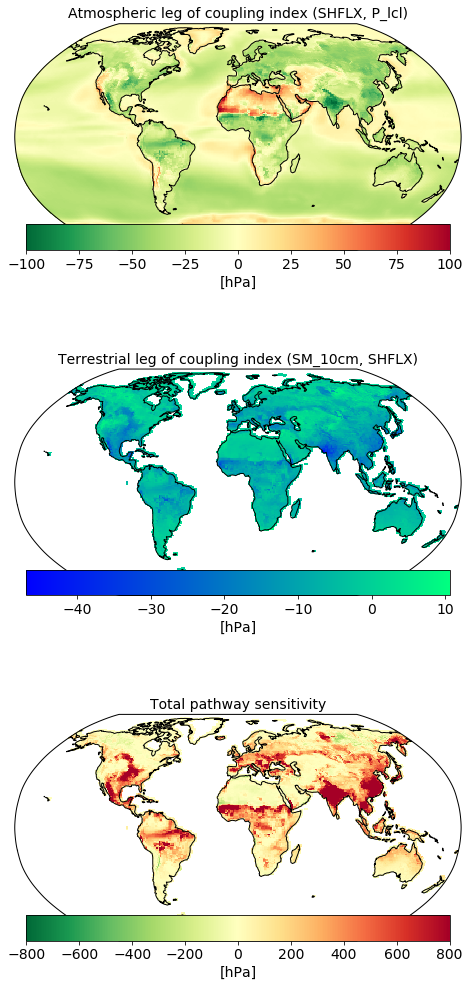

In [58]:
# Set up figure 
fig, ax_array = plt.subplots(3,1, figsize=(8, 18), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.Robinson()})
#Adjust space between subplots 
fig.subplots_adjust(hspace = 0.2,wspace = 0.1)
#Get individual axis handles
ax1,ax2,ax3 = ax_array.flatten()

# --- Panel 1: Atmospheric sensitivity --- # 
ax1.set_global()    # Set global map extent 

# Make sure there's a cyclic point (otherwise you get a white line down the middle)
atmo_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(atmoLeg_coupling.hfss_Plcl_CI[iSeason,:,:]), lon)

# Contour the (cyclic) field of interest 
contour_plot = ax1.pcolormesh(lon_cyclic,lat,atmo_cyclic,
                                vmax = 100,
                                vmin = -100,
                                cmap='RdYlGn_r',
                                transform=ccrs.PlateCarree())
# Add coastlines
ax1.coastlines()

# Set title
ax1.set_title('Atmospheric leg of coupling index (SHFLX, P_lcl)', fontsize=14)
    
# Add colorbar 
ax_position = ax1.get_position()
cbar_ax     = fig.add_axes([ax_position.x0+0.02, ax_position.y0, ax_position.width-0.04, 0.02])
cbar        = plt.colorbar(contour_plot, orientation='horizontal', cax=cbar_ax)
# Set label and fontsize
cbar.set_label('[hPa]',fontsize=14)
cbar.ax.tick_params(labelsize=14)
# ----------------------------------------



# --- Panel 2: Land sensitivity --- #
ax2.set_global()    # Set global map extent 

# Make sure there's a cyclic point (otherwise you get a white line down the middle)
terra_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terraLeg_coupling.mrsos_hfss_CI[iSeason,:,:]), lon)

# Contour the (cyclic) field of interest 
contour_plot = ax2.pcolormesh(lon_cyclic,lat,terra_cyclic,
                                cmap='winter',
                                transform=ccrs.PlateCarree())
# Add coastlines
ax2.coastlines()

# Set title
ax2.set_title('Terrestrial leg of coupling index (SM_10cm, SHFLX)', fontsize=14)
    
# Add colorbar 
ax_position = ax2.get_position()
cbar_ax     = fig.add_axes([ax_position.x0+0.02, ax_position.y0, ax_position.width-0.04, 0.02])
cbar        = plt.colorbar(contour_plot, orientation='horizontal', cax=cbar_ax)
# Set label and fontsize
cbar.set_label('[hPa]',fontsize=14)
cbar.ax.tick_params(labelsize=14)
# -----------------------------------------------



# --- Panel 3: Total pathway sensitivity --- #
ax3.set_global()    # Set global map extent 

# Make sure there's a cyclic point (otherwise you get a white line down the middle)
total_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(totalSensitivity[iSeason,:,:]), lon)

# Contour the (cyclic) field of interest 
contour_plot = ax3.pcolormesh(lon_cyclic,lat,total_cyclic,
                                vmax = 800,
                                vmin = -800,
                                cmap='RdYlGn_r',
                                transform=ccrs.PlateCarree())
# Add coastlines
ax3.coastlines()

# Set title
ax3.set_title('Total pathway sensitivity', fontsize=14)
    
# Add colorbar 
ax_position = ax3.get_position()
cbar_ax     = fig.add_axes([ax_position.x0+0.02, ax_position.y0, ax_position.width-0.04, 0.02])
cbar        = plt.colorbar(contour_plot, orientation='horizontal', cax=cbar_ax)
# Set label and fontsize
cbar.set_label('[hPa]',fontsize=14)
cbar.ax.tick_params(labelsize=14)
# -----------------------------------------------



In [14]:
print(cm.list_metrics)

['CouplingIndex', 'MixingDiagram', 'HeatCond', 'ConvTrig', 'RHTend', 'SoilMemory']


## Testing section
